    1. Package load
    2. Data load
    3. Data 탐색(EDA)
    4. 상관분석
    
    5. 결론 : 경기도 구리시 ( 13011 )
       1) 오후 5시 이후 부터 다음날 오전 0시까지 많이 빌림
       2) 계절적 : 20대 10월 ,7월,8월 순 / 41주차 순   
       3) 차종 :   준중형 > 경형 >소형SUV > 준중형suv  / 
          - 경형:  35.247099 , 준중형: 36.007993,  준중형SUV: 11.820767, 소형SUV : 12.927523 ,  
       4) 토요일:  17.592806 , 일요일: 15.755899 .. 
       5) term 제외 : 장기 렌트 제외 
          92%로 계산 :11921  ... 결과 다소 나음 
          나이 50대 이하 , 차종 4가지(경형, 준중형, 소형suv, 준준형suv) 계산 : 11012 (84.6%)


In [1]:
# pandas를 pd이름으로 호출
import requests
from io import BytesIO
from itertools import product
from datetime import datetime

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.ticker as plticker
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
import statsmodels.api as sm
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

plt.rc('font', family='NanumGothic')
plt.rcParams['font.size'] = 14
plt.rcParams["figure.figsize"] = (22,4)

In [2]:
# customer_lib_1.csv 파일을 불러와서 변수 customer_1 값으로 할당

df = pd.read_csv('../div_data/구리시.csv')
df_final = pd.read_csv('../data/230119_final_join.csv')

In [3]:
df_final['region2'].unique()

array(['고양시 덕양구', '고양시 일산동구', '고양시 일산서구', '광명시', '구리시', '김포시', '남양주시',
       '성남시 분당구', '성남시 수정구', '성남시 중원구', '안양시 동안구', '안양시 만안구', '양평군',
       '의정부시', '하남시', '화성시'], dtype=object)

In [4]:
#data 확인
df.head()

,region1,region2,reservation_return_at,reservation_start_at,age_group,gender,car_model,r_week_day,s_week_day,is_weekend,r_weeknum,r_year,r_month,r_yyyyww,s_weeknum,s_year,s_month,s_yyyyww,date_term
0,경기도,구리시,2019-09-13 23:08:25+00:00,2019-09-13 06:00:00+00:00,1,female,소형SUV,4,4,0,37,2019,2019-09,2019-37,37,2019,2019-09,2019-37,17.14
1,경기도,구리시,2019-06-30 18:01:46+00:00,2019-06-30 16:40:00+00:00,1,unknown,경형,6,6,1,26,2019,2019-06,2019-26,26,2019,2019-06,2019-26,1.36
2,경기도,구리시,2019-02-10 00:09:48+00:00,2019-02-09 23:20:00+00:00,1,male,준중형,6,5,1,6,2019,2019-02,2019-6,6,2019,2019-02,2019-6,0.83
3,경기도,구리시,2019-03-30 14:48:09+00:00,2019-03-30 09:30:00+00:00,2,male,소형SUV,5,5,1,13,2019,2019-03,2019-13,13,2019,2019-03,2019-13,5.30
4,경기도,구리시,2019-04-29 11:35:31+00:00,2019-04-29 07:00:00+00:00,1,male,소형,0,0,0,18,2019,2019-04,2019-18,18,2019,2019-04,2019-18,4.59


In [5]:
#EDA  ... 지역 확인
print("region1 : ",len(df['region1'].unique()))
print(df['region1'].unique())
print("region2 : ",len(df['region2'].unique()))
print(df['region2'].unique())
print(len(df))

region1 :  1
['경기도']
region2 :  1
['구리시']
13011


In [6]:
df['index_int'] = ''

for i , value in enumerate(df['region1']):
    df['index_int'][i] = i


/tmp/ipykernel_64/3612480014.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['index_int'][i] = i


In [7]:
df['reservation_return_hour3'] = ''
for i , value in enumerate(df['reservation_return_at']):
    temp = str(df['reservation_return_at'][i])
    df['reservation_return_hour3'][i] = temp[10:13]

/tmp/ipykernel_64/818228797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reservation_return_hour3'][i] = temp[10:13]


In [8]:
#column 변경  : object > date 
df['reservation_return_at'] = pd.to_datetime(df['reservation_return_at'])
df['reservation_start_at'] = pd.to_datetime(df['reservation_start_at'])
df['gender'] = df['gender'].astype(str)
df['car_model'] = df['car_model'].astype(str)
df['region1'] = df['region1'].astype(str)
df['region2'] = df['region2'].astype(str)

In [9]:

df['reservation_return_date'] = df['reservation_return_at'].dt.to_period(freq = 'D')
df['reservation_start_date'] = df['reservation_start_at']. dt.to_period(freq = 'D')
df['reservation_return_hour'] = df['reservation_return_at'].dt.to_period(freq = 'H')
df['reservation_start_hour'] = df['reservation_start_at']. dt.to_period(freq = 'H')


/opt/conda/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [10]:
temp_hour = df['reservation_return_hour3'].value_counts().sort_index()

In [11]:
df_weekend = df[df['is_weekend'] == 1]  
print(round(len(df_weekend)/len(df),2))
temp_weekend_hour = df_weekend['reservation_return_hour3'].value_counts().sort_index()

0.33


In [12]:
df_weekday = df[df['is_weekend'] == 0]  
print(round(len(df_weekday)/len(df),2))
temp_weekday_hour = df_weekday['reservation_return_hour3'].value_counts().sort_index()

0.67


<AxesSubplot:>

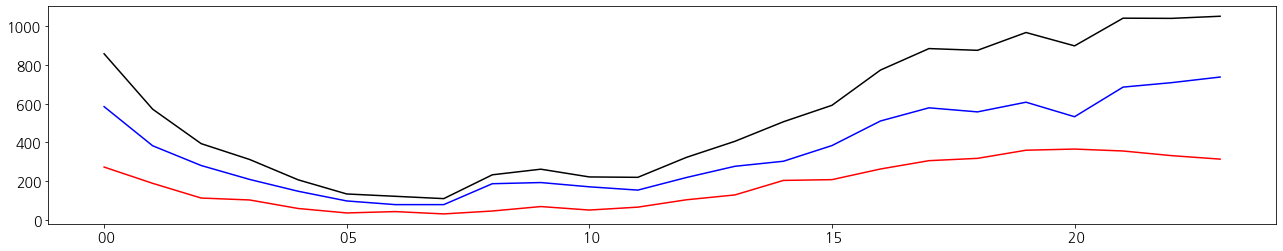

In [13]:
temp_hour.plot(color='black')
temp_weekday_hour.plot(color='blue')
temp_weekend_hour.plot(color='red')

In [14]:
print("s_month : ",len(df['s_month'].unique()))
print(df['s_month'].unique())
print(df['s_month'].value_counts().sort_index())

s_month :  12
['2019-09' '2019-06' '2019-02' '2019-03' '2019-04' '2019-08' '2019-10'
 '2019-01' '2019-07' '2019-11' '2019-05' '2019-12']
2019-01     989
2019-02    1019
2019-03    1117
2019-04    1082
2019-05    1207
2019-06    1077
2019-07    1250
2019-08    1241
2019-09    1281
2019-10    1432
2019-11    1305
2019-12      11
Name: s_month, dtype: int64


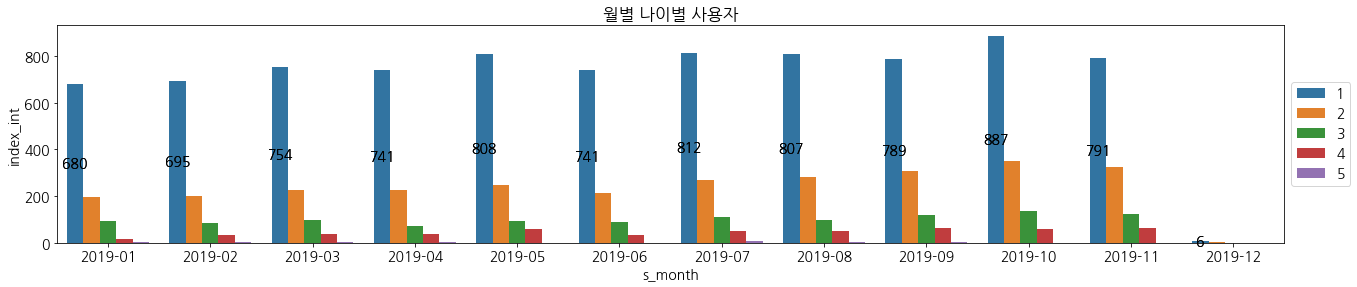

In [15]:
#EDA  ... 지역별 월별 사용자 확인(3) .. 지역 2
grouped = df.groupby([df['age_group'], df['s_month']]).count().sort_values(by='s_month')
ax = sns.barplot(data=grouped.reset_index(), x='s_month', y='index_int', hue='age_group')

containers = ax.containers[0]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
# plt.rcParams['font.size'] = 8
plt.title('월별 나이별 사용자')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
# 20대 7월, 8월,5월 순 

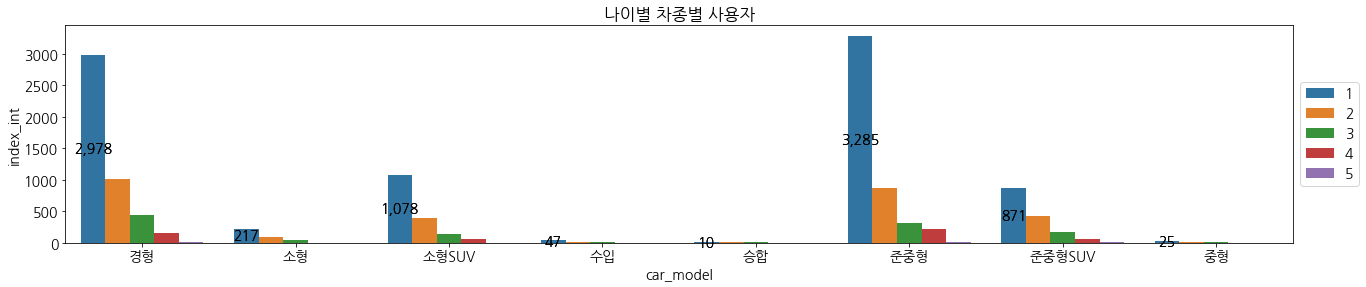

In [16]:
#EDA  ... 지역별 월별 사용자 확인(3) .. 지역 2
grouped = df.groupby([df['age_group'], df['car_model']]).count().sort_values(by='car_model')
ax = sns.barplot(data=grouped.reset_index(), x='car_model', y='index_int', hue='age_group')

containers = ax.containers[0]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
# plt.rcParams['font.size'] = 8
plt.title('나이별 차종별 사용자')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
# 20대, 경형, 소형suv , 준중형 순

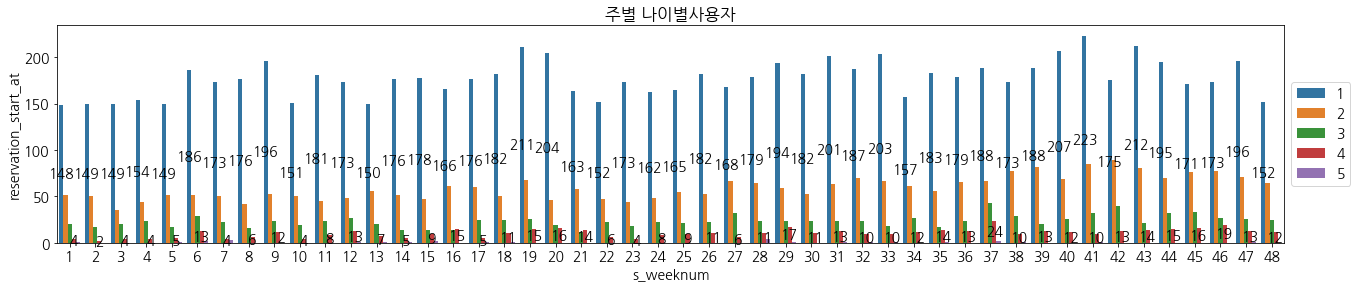

In [17]:
#EDA  ... 지역별 월별 사용자 확인(3) .. 지역 2
grouped = df.groupby([df['age_group'], df['s_weeknum']]).count().sort_values(by='s_weeknum')
ax = sns.barplot(data=grouped.reset_index(), x='s_weeknum', y='reservation_start_at', hue='age_group')

containers = ax.containers[-2]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
# plt.rcParams['font.size'] = 8
plt.title('주별 나이별사용자')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#20대 29,33주차 순 

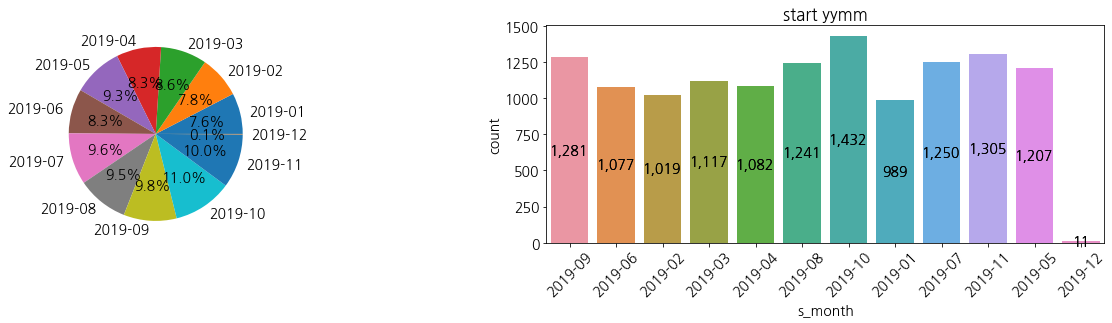

In [18]:
# axes[0].plot(x, y)
fig, axes = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (22,4)

pie_data = df.groupby(['s_month']).count().region2
axes[0].pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
# plt.title('지역별 사용자')

ax = sns.countplot(data=df, x='s_month')  #x축 라벨

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('start yymm')
plt.xticks(rotation=45)
plt.show()
# 10월, 7월 순

In [19]:
print(df['age_group'].unique())
print(df['age_group'].value_counts()) # 1 : 20~29 세, 2 : 30~39 세, 3 : 40~49 세,- 4 : 50~59 세,- 5 : 60세 이상

[1 2 3 5 4]
1    8511
2    2850
3    1120
4     502
5      28
Name: age_group, dtype: int64


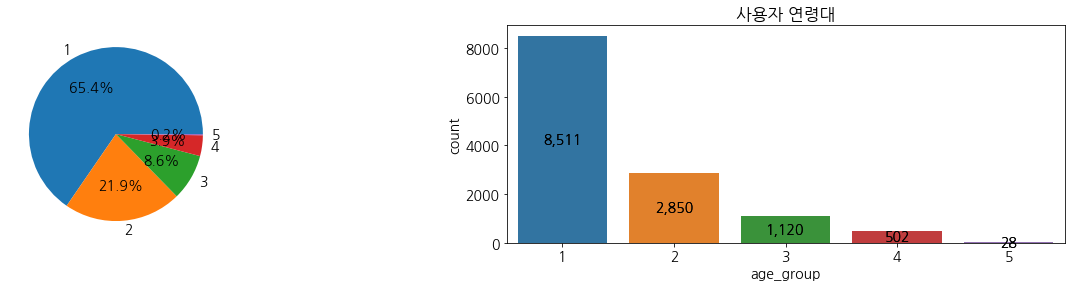

In [20]:
#EDA  ...사용자 연령대 (1)
fig, axes = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (22,4)

pie_data = df.groupby(['age_group']).count().region2
axes[0].pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('사용자 연령대')

ax = sns.countplot(data=df, x='age_group')   #x축 라벨

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('사용자 연령대')
plt.show()

In [21]:
#EDA  ...사용자 연령대 (2)
print(df['gender'].unique())
print(df['gender'].value_counts()) # 1 : 20~29 세, 2 : 30~39 세, 3 : 40~49 세,- 4 : 50~59 세,- 6 : 60세 이상

['female' 'unknown' 'male']
male       9895
female     2691
unknown     425
Name: gender, dtype: int64


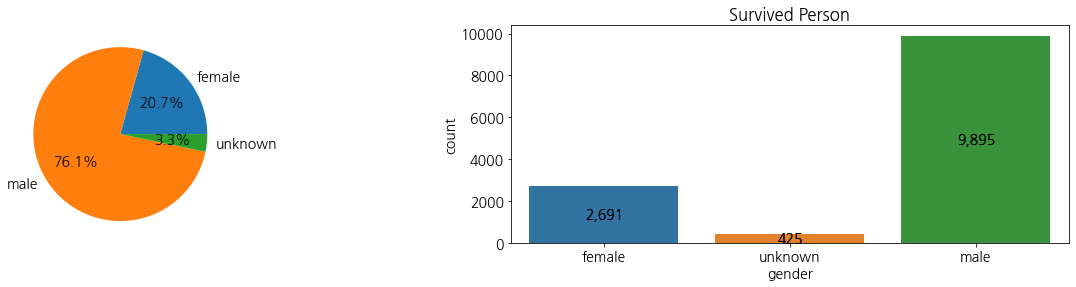

In [22]:
#EDA  ...사용자 성별(1)
fig, axes = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (22,4)

pie_data = df.groupby(['gender']).count().region2
axes[0].pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('지역별 사용자')

ax = sns.countplot(data=df, x='gender')   #x축 라벨

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Survived Person')
plt.show()

In [23]:
#EDA  ...차종별  ['경형' '준중형' 준중형SUV' '소형SUV' '소형' '준대형' '중형' ??? 중형SUV' '승합' '??수입' ??'대형']
print("car_model : ",len(df['car_model'].unique()))
print(df['car_model'].unique().sort())
print(df['car_model'].value_counts()) 

car_model :  8
None
준중형       4685
경형        4586
소형SUV     1682
준중형SUV    1538
소형         368
수입          74
중형          49
승합          29
Name: car_model, dtype: int64


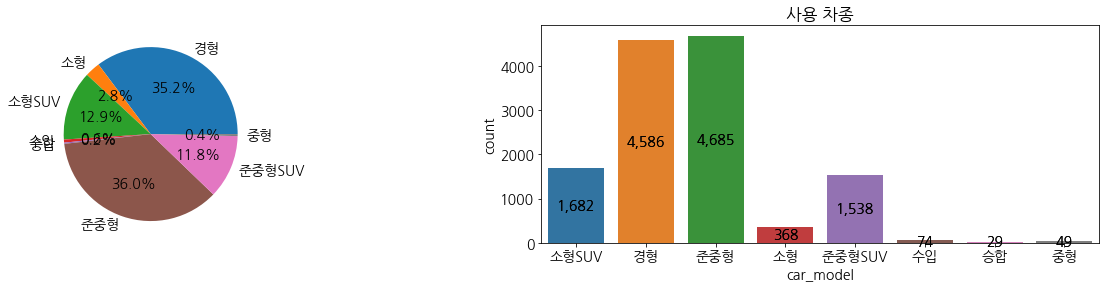

In [24]:
#EDA  ...차종별(1)
fig, axes = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (22,4)

pie_data = df.groupby(['car_model']).count().region2
axes[0].pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('사용 차종')

ax = sns.countplot(data=df, x='car_model')   #x축 라벨

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('사용 차종')
plt.show()

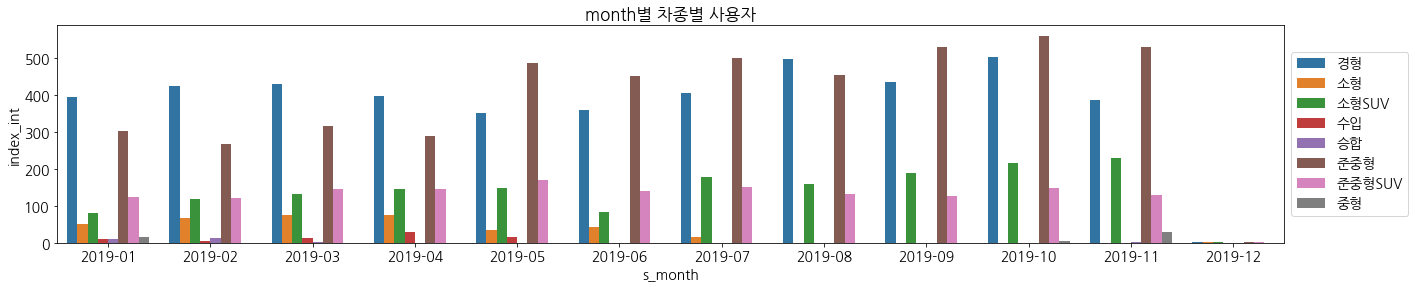

In [25]:
#EDA  ...차종별(1)  ..+지역별
grouped = df['index_int'].groupby([df['region2'], df['car_model'],df['s_month']]).count()
ax = sns.barplot(data=grouped.reset_index(), x='s_month', y='index_int', hue='car_model')

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')

plt.title('month별 차종별 사용자')
# plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#2,3,4,5 준중형, 그 외 경형

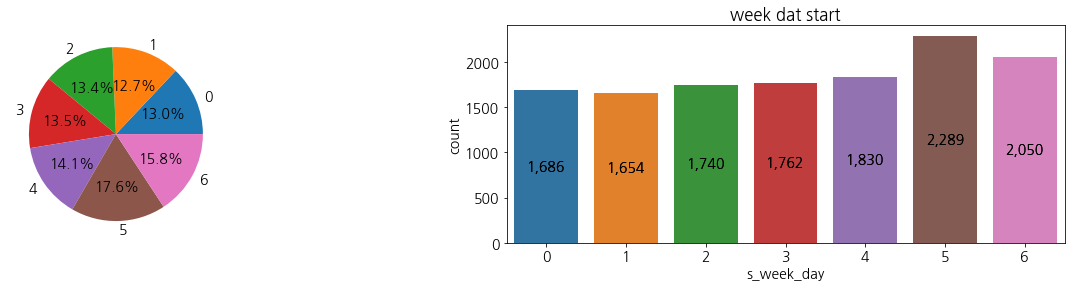

In [26]:
#EDA  ...weekday(1)  0 월요일 .... 6 일요일
fig, axes = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (22,6)
plt.rc('figure', titlesize=12)
plt.rc('axes', labelsize=10) 

pie_data = df.groupby(['s_week_day']).count().region2
axes[0].pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('week dat start')

ax = sns.countplot(data=df, x='s_week_day')   #x축 라벨

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('week dat start')
plt.show()

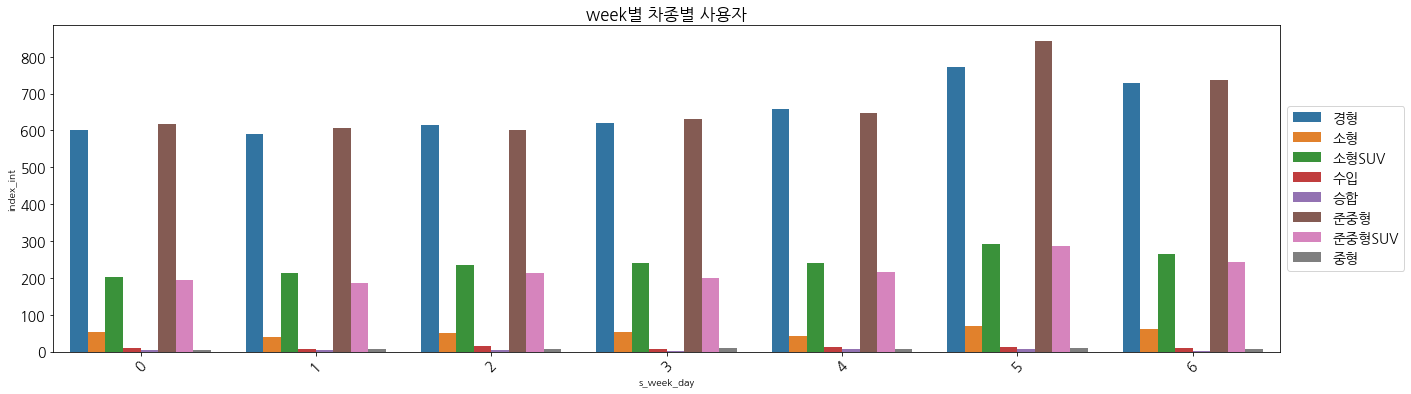

In [27]:
#EDA  ...차종별(1)  ..+지역별2
grouped = df['index_int'].groupby([df['s_week_day'], df['car_model']]).count()
ax = sns.barplot(data=grouped.reset_index(), x='s_week_day', y='index_int', hue='car_model')

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')

plt.title('week별 차종별 사용자')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#경형, > 준중형 > 소형suv

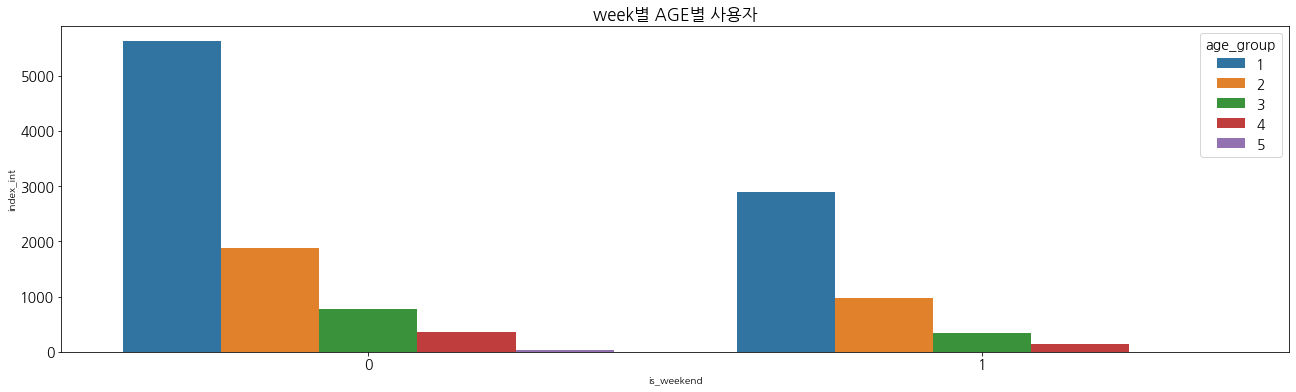

In [28]:
#EDA  ...weekday(1) + 지역
grouped = df['index_int'].groupby([df['is_weekend'],df['age_group']]).count()
ax = sns.barplot(data=grouped.reset_index(), x='is_weekend', y='index_int', hue='age_group')

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')

plt.title('week별 AGE별 사용자')
# plt.xticks(rotation=45)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


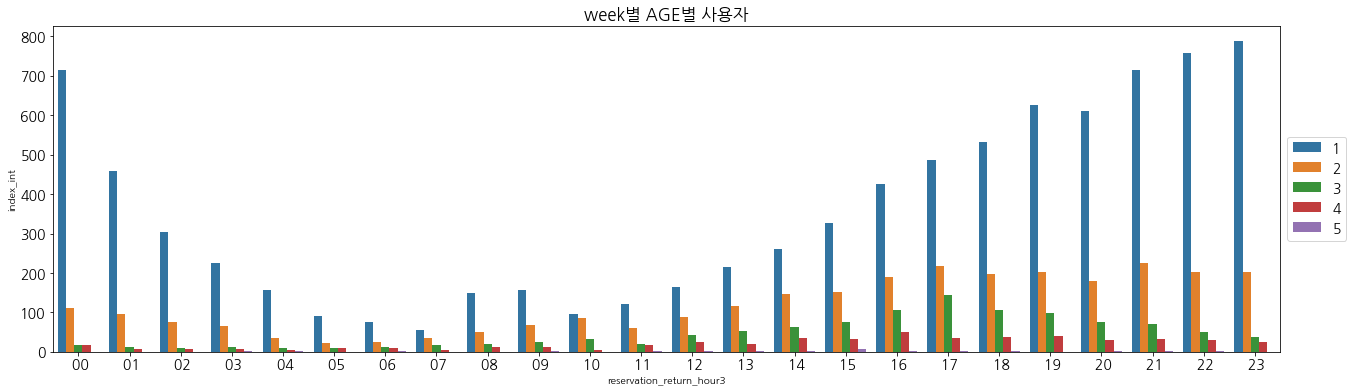

In [29]:
#EDA  ...weekday(1) + 지역
grouped = df['index_int'].groupby([df['reservation_return_hour3'],df['age_group']]).count()
ax = sns.barplot(data=grouped.reset_index(), x='reservation_return_hour3', y='index_int', hue='age_group')

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')

plt.title('week별 AGE별 사용자')
# plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#오후 3시 이후 많이 빌림

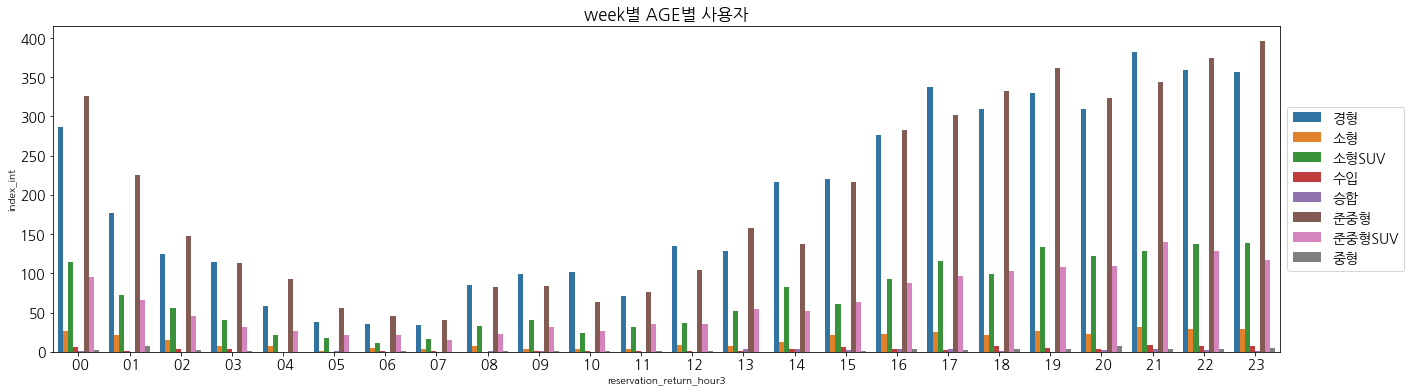

In [30]:
#EDA  ...weekday(1) + 지역
grouped = df['index_int'].groupby([df['reservation_return_hour3'],df['car_model']]).count()
ax = sns.barplot(data=grouped.reset_index(), x='reservation_return_hour3', y='index_int', hue='car_model')

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')

plt.title('week별 AGE별 사용자')
# plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


상관분석---------------------------------------------------------------------------------------------------------------------------

In [31]:
df1 = df

In [32]:
df1.head()

,region1,region2,reservation_return_at,reservation_start_at,age_group,gender,car_model,r_week_day,s_week_day,is_weekend,...,s_year,s_month,s_yyyyww,date_term,index_int,reservation_return_hour3,reservation_return_date,reservation_start_date,reservation_return_hour,reservation_start_hour
0,경기도,구리시,2019-09-13 23:08:25+00:00,2019-09-13 06:00:00+00:00,1,female,소형SUV,4,4,0,...,2019,2019-09,2019-37,17.14,0,23,2019-09-13,2019-09-13,2019-09-13 23:00,2019-09-13 06:00
1,경기도,구리시,2019-06-30 18:01:46+00:00,2019-06-30 16:40:00+00:00,1,unknown,경형,6,6,1,...,2019,2019-06,2019-26,1.36,1,18,2019-06-30,2019-06-30,2019-06-30 18:00,2019-06-30 16:00
2,경기도,구리시,2019-02-10 00:09:48+00:00,2019-02-09 23:20:00+00:00,1,male,준중형,6,5,1,...,2019,2019-02,2019-6,0.83,2,00,2019-02-10,2019-02-09,2019-02-10 00:00,2019-02-09 23:00
3,경기도,구리시,2019-03-30 14:48:09+00:00,2019-03-30 09:30:00+00:00,2,male,소형SUV,5,5,1,...,2019,2019-03,2019-13,5.30,3,14,2019-03-30,2019-03-30,2019-03-30 14:00,2019-03-30 09:00
4,경기도,구리시,2019-04-29 11:35:31+00:00,2019-04-29 07:00:00+00:00,1,male,소형,0,0,0,...,2019,2019-04,2019-18,4.59,4,11,2019-04-29,2019-04-29,2019-04-29 11:00,2019-04-29 07:00


In [33]:
my_map = {
    "male": "1",
    "female": "0",
    "unknown":"2"
}

In [34]:
df1["gender"] = df1["gender"].map(my_map)

In [35]:
print(df1["gender"].value_counts())
print((df1["gender"].value_counts() / df1["gender"].count())*100)

1    9895
0    2691
2     425
Name: gender, dtype: int64
1    76.051034
0    20.682499
2     3.266467
Name: gender, dtype: float64


In [36]:
my_map2 = {
    '경형':'1',
    '준중형':'2',
    '준중형SUV':'3',
    '소형SUV':'4',
    '소형':'5',
    '준대형':'6',
    '중형': '7',
    '중형SUV':'8',
    '승합':'9',
    '수입':'10',
    '대형':'11'
}

In [37]:
df1["car_model"] = df1["car_model"].map(my_map2)

In [38]:
print(df1["car_model"].value_counts().sort_index())
print((df1["car_model"].value_counts() / df1["car_model"].count())*100)

1     4586
10      74
2     4685
3     1538
4     1682
5      368
7       49
9       29
Name: car_model, dtype: int64
2     36.007993
1     35.247099
4     12.927523
3     11.820767
5      2.828376
10     0.568750
7      0.376604
9      0.222888
Name: car_model, dtype: float64


In [39]:
print(df1['s_week_day'].value_counts().sort_index())
print((df1["s_week_day"].value_counts() / df1["s_week_day"].count())*100)

0    1686
1    1654
2    1740
3    1762
4    1830
5    2289
6    2050
Name: s_week_day, dtype: int64
5    17.592806
6    15.755899
4    14.065022
3    13.542387
2    13.373300
0    12.958266
1    12.712320
Name: s_week_day, dtype: float64


In [40]:
print(df1['date_term'].unique())
print(len(df1['date_term'].unique()))

[17.14  1.36  0.83 ... 38.77 24.27 28.19]
2433


In [41]:
# 
df1['term_normal'] = df1["date_term"].apply(lambda x : round((x - df1['date_term'].min()) / (df1['date_term'].max() - df1['date_term'].min()),3) )

In [42]:
df1.describe()

,age_group,r_week_day,s_week_day,is_weekend,r_weeknum,r_year,s_weeknum,s_year,date_term,term_normal
count,13011.000000,13011.000000,13011.000000,13011.000000,13011.000000,13011.0,13011.000000,13011.0,13011.00000,13011.000000
mean,1.515564,3.223349,3.188456,0.333487,25.764738,2019.0,25.729767,2019.0,7.36234,0.021916
std,0.824192,2.025376,2.008895,0.471477,13.763526,0.0,13.758413,0.0,13.33895,0.039710
min,1.000000,0.000000,0.000000,0.000000,1.000000,2019.0,1.000000,2019.0,0.00000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,14.000000,2019.0,14.000000,2019.0,2.03000,0.006000
50%,1.000000,3.000000,3.000000,0.000000,27.000000,2019.0,27.000000,2019.0,3.91000,0.012000
75%,2.000000,5.000000,5.000000,1.000000,38.000000,2019.0,38.000000,2019.0,7.15000,0.021000
max,5.000000,6.000000,6.000000,1.000000,48.000000,2019.0,48.000000,2019.0,335.93000,1.000000


<AxesSubplot:xlabel='date_term', ylabel='Density'>

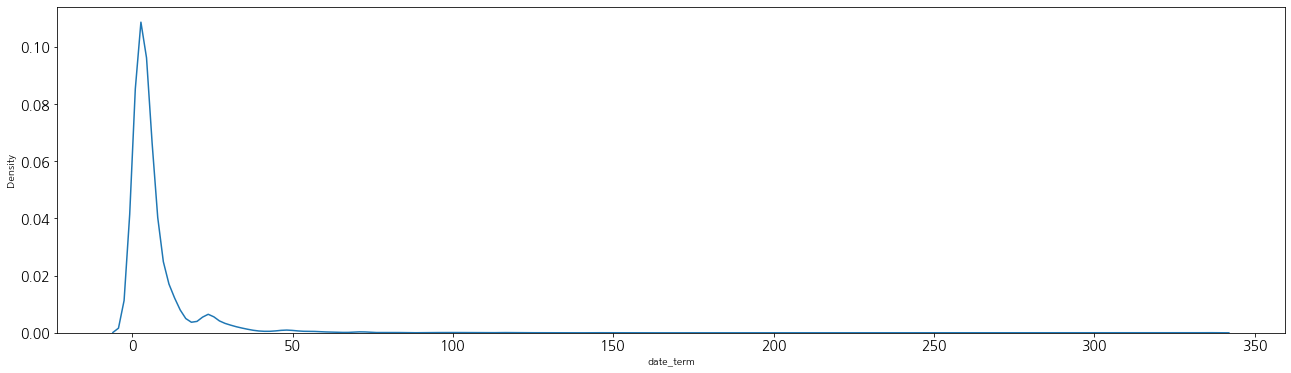

In [43]:
sns.kdeplot(df1['date_term'])

In [44]:
df1['gender'] = df1['gender'].astype(int)
df1['car_model'] = df1['car_model'].astype(int)

In [45]:
df1.describe()

,age_group,gender,car_model,r_week_day,s_week_day,is_weekend,r_weeknum,r_year,s_weeknum,s_year,date_term,term_normal
count,13011.000000,13011.000000,13011.000000,13011.000000,13011.000000,13011.000000,13011.000000,13011.0,13011.000000,13011.0,13011.00000,13011.000000
mean,1.515564,0.825840,2.189071,3.223349,3.188456,0.333487,25.764738,2019.0,25.729767,2019.0,7.36234,0.021916
std,0.824192,0.457355,1.331949,2.025376,2.008895,0.471477,13.763526,0.0,13.758413,0.0,13.33895,0.039710
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2019.0,1.000000,2019.0,0.00000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,14.000000,2019.0,14.000000,2019.0,2.03000,0.006000
50%,1.000000,1.000000,2.000000,3.000000,3.000000,0.000000,27.000000,2019.0,27.000000,2019.0,3.91000,0.012000
75%,2.000000,1.000000,3.000000,5.000000,5.000000,1.000000,38.000000,2019.0,38.000000,2019.0,7.15000,0.021000
max,5.000000,2.000000,10.000000,6.000000,6.000000,1.000000,48.000000,2019.0,48.000000,2019.0,335.93000,1.000000


In [46]:
df2 = df1[['age_group', 'gender','car_model','r_week_day','s_week_day', 
           'is_weekend','r_weeknum','s_weeknum','date_term','term_normal']]

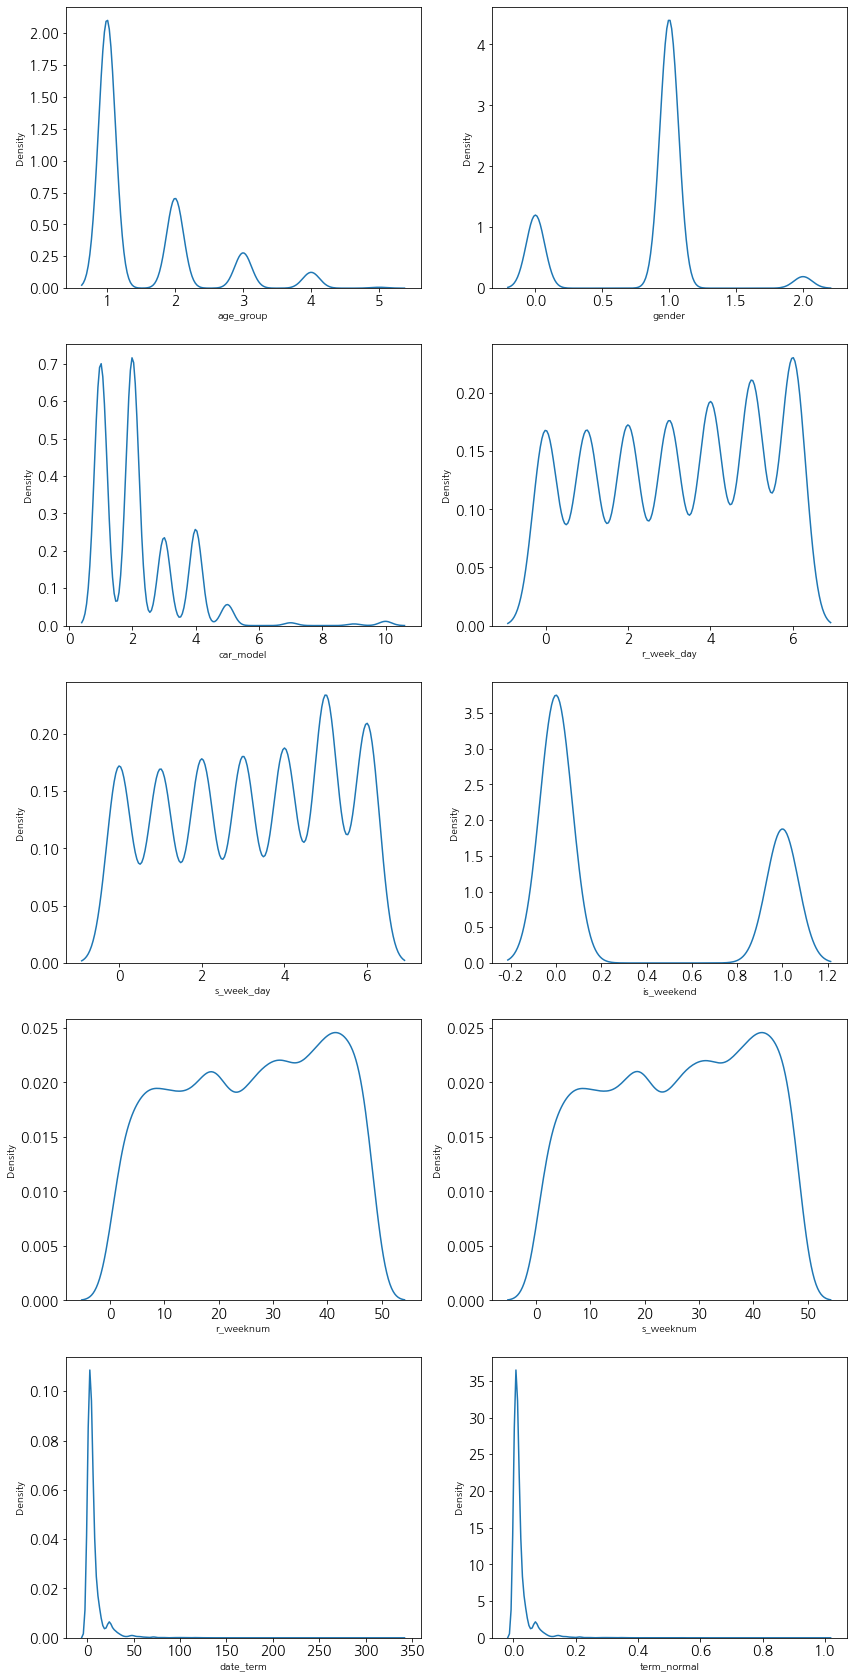

In [47]:
# 5) data 호가인 grapes ............... 중요 log변환  
# 아래거 하 ㄴ후 다시
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(5, 2, figsize=(14, 30))   # 가로스크롤 때문에 그래프 확인이 불편하다면 figsize의 x값을 조절해 보세요. 

# id 변수(count==0인 경우)는 제외하고 분포를 확인합니다.
count = 0
columns = df2.columns
for row in range(5):
    for col in range(2):
        sns.kdeplot(df2[columns[count]], ax=ax[row][col])
        #ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 10:
            break

In [48]:
len(df1)

13011

In [49]:
# # 이상치 확인 : Pclass 이상치 없음(95% 수준), age(95% 초과 : 69개  )
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col]) <= z].index

In [50]:
outlier_df = df1.loc[outlier(df1, 'date_term', 1)]   #2=95, 1 =68%
print(len(outlier_df))
print(round(len(outlier_df)/len(df1),2))

11921
0.92


In [51]:
# outlier_df = outlier_df.loc[outlier(outlier_df, 'age_group', 2)]
# len(outlier_df)

In [52]:
# outlier_df = outlier_df.loc[outlier(outlier_df, 'car_model', 2)]
# len(outlier_df)

In [53]:
# outlier_df = outlier_df.loc[outlier(outlier_df, 's_weeknum', 2)]
# len(outlier_df)

In [54]:
def arima_sarima(data):
    print('ARIMA')
    df_function = pd.DataFrame(data['reservation_start_date'].value_counts())
    df_function.reset_index(inplace = True)
    df_function.columns = ['Date', 'Demand']
    df_function.sort_values(by = ['Date'], inplace = True)
    df_function['Date'] = df_function['Date'].astype(str)

    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8))  
    plt.plot(df_function['Date'], df_function['Demand'])
    plt.xticks(rotation = 45)
    loc = plticker.MultipleLocator(base = 30.0) 
    ax.xaxis.set_major_locator(loc)
    plt.show()

    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8))  
    plt.plot(df_function['Date'][0:100], df_function['Demand'][0:100], "b.-")
    plt.xticks(rotation = 45)
    loc = plticker.MultipleLocator(base = 7.0) 
    ax.xaxis.set_major_locator(loc)
    plt.show()

    df_function['Date'] = pd.to_datetime(df_function['Date'])
    df_function.set_index('Date', inplace = True)

    demand_rate = df_function['Demand']
    STL_decomposed = STL(demand_rate, seasonal = 7, period = 7).fit()
    fig = STL_decomposed.plot()
    fig.set_size_inches(10, 16)

    for ax in fig.axes :
        loc = plticker.MultipleLocator(base = 30.0) 
        ax.xaxis.set_major_locator(loc)
        ax.xaxis.set_minor_locator(loc)
        ax.tick_params(axis='x', labelrotation = 45)
    
    plt.show()
    print(STL_decomposed.resid[STL_decomposed.resid > 0.1])

    demand_rate_replace = demand_rate.copy()
    demand_rate_replace[STL_decomposed.resid>0.1] = np.NaN
    demand_rate_replace = demand_rate_replace.interpolate(method='linear') 

    STL_decomposed_replace = STL(demand_rate_replace, seasonal = 7, period = 7).fit()
    fig = STL_decomposed_replace.plot()
    fig.set_size_inches(10, 16)

    for ax in fig.axes :
        loc = plticker.MultipleLocator(base = 30.0) 
        ax.xaxis.set_major_locator(loc)
        ax.xaxis.set_minor_locator(loc)
        ax.tick_params(axis='x', labelrotation = 45)
    
    plt.show()
    print(STL_decomposed_replace.resid[STL_decomposed_replace.resid > 0.1])    

    plot_acf(demand_rate_replace)
    plot_pacf(demand_rate_replace)
    plt.show()

    demand_rate_diff = demand_rate_replace.diff(7).dropna()
    plot_acf(demand_rate_diff)
    plot_pacf(demand_rate_diff)
    plt.show()

    demand_rate_diff = pd.DataFrame(demand_rate_diff)
    demand_rate_diff.columns = ['Diff']

    p_value = adfuller(demand_rate_diff.reset_index().Diff)[1]
    print(f'p-value of ADF test (diff 7): {p_value}')
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
    plt.plot(demand_rate_diff.reset_index().Diff);
    plt.show()

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
    plt.plot(demand_rate_diff.reset_index().Diff[0:100], "b.-")
    plt.show()

    arima_rate_train = demand_rate_diff[demand_rate_diff.index<'2019-09-08']
    arima_rate_test = demand_rate_diff[demand_rate_diff.index>='2019-09-08']
    model = sm.tsa.arima.ARIMA(arima_rate_train, order=(3, 1, 1))  
    fitted_m = model.fit()  
    print(fitted_m.summary())

    plot_predict(fitted_m)
    plt.show()

    fc = fitted_m.forecast(len(arima_rate_test), alpha = 0.05)  

    arima_rmse = np.sqrt(sklearn.metrics.mean_squared_error(arima_rate_test, fc))
    print(f'Test RMSE: {arima_rmse}\n')

    fc_series = pd.Series(fc, index = arima_rate_test.index)   

    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8))

    plt.plot(arima_rate_train, alpha = 0.5, color = 'black', label = 'training')
    plt.plot(arima_rate_test, alpha = 0.5, color = 'red', label = 'actual operation rate')
    plt.plot(fc_series, alpha = 0.5, color = 'blue', label = 'predicted operation rate')
    plt.legend()

    plt.xticks(rotation = 45)
    loc = plticker.MultipleLocator(base = 30.0) 
    ax.xaxis.set_major_locator(loc)

    plt.show()

    print('\n\n\n\nSARIMA')
    model_auto_arima = pm.auto_arima(arima_rate_train, seasonal = True, m = 7, D = 1) 
    print(model_auto_arima)
    print(model_auto_arima.params())
    print(model_auto_arima.aic())

    sarima_rate_pred, conf_int = model_auto_arima.predict(n_periods = arima_rate_test.shape[0], return_conf_int = True)
    sarima_rmse = np.sqrt(sklearn.metrics.mean_squared_error(arima_rate_test, sarima_rate_pred))
    print(f'Test RMSE: {sarima_rmse}\n')

    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8))
    plt.xticks(rotation = 45)
    loc = plticker.MultipleLocator(base = 7.0) 
    ax.xaxis.set_major_locator(loc)

    plt.plot(arima_rate_train[-50:], alpha = 0.5, color = 'black', label = 'training')
    plt.plot(arima_rate_test, alpha = 0.5, color = 'red', label = 'actual operation rate')
    plt.plot(arima_rate_test.index.values, sarima_rate_pred, alpha = 0.5, color = 'blue', label = 'predicted operation rate')
    plt.fill_between(arima_rate_test.index.values, conf_int[:, 0], conf_int[:, 1], alpha = 0.1, color = 'b') 
    plt.legend()
    plt.show()

    model_auto_arima.plot_diagnostics(figsize=(10, 10))
    plt.show()

ARIMA


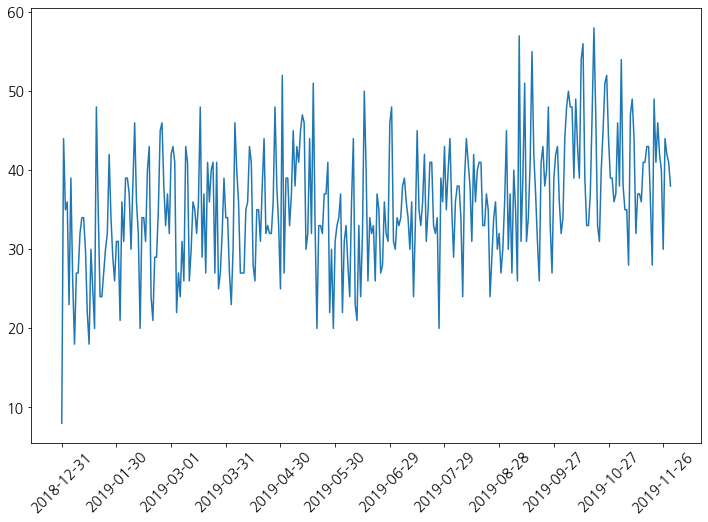

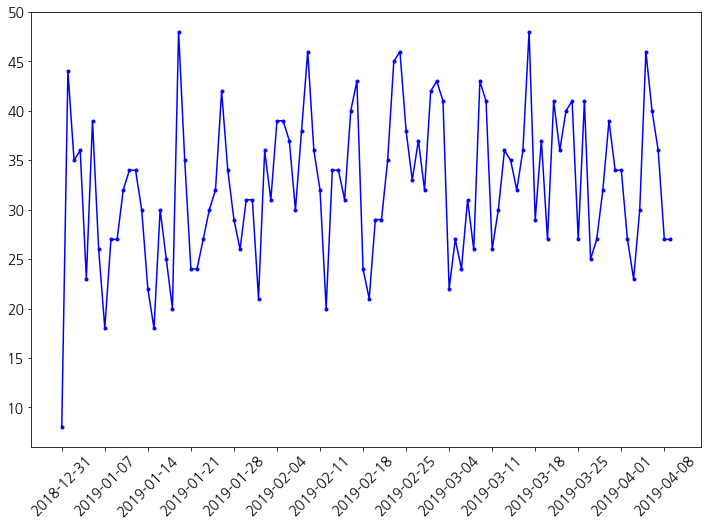

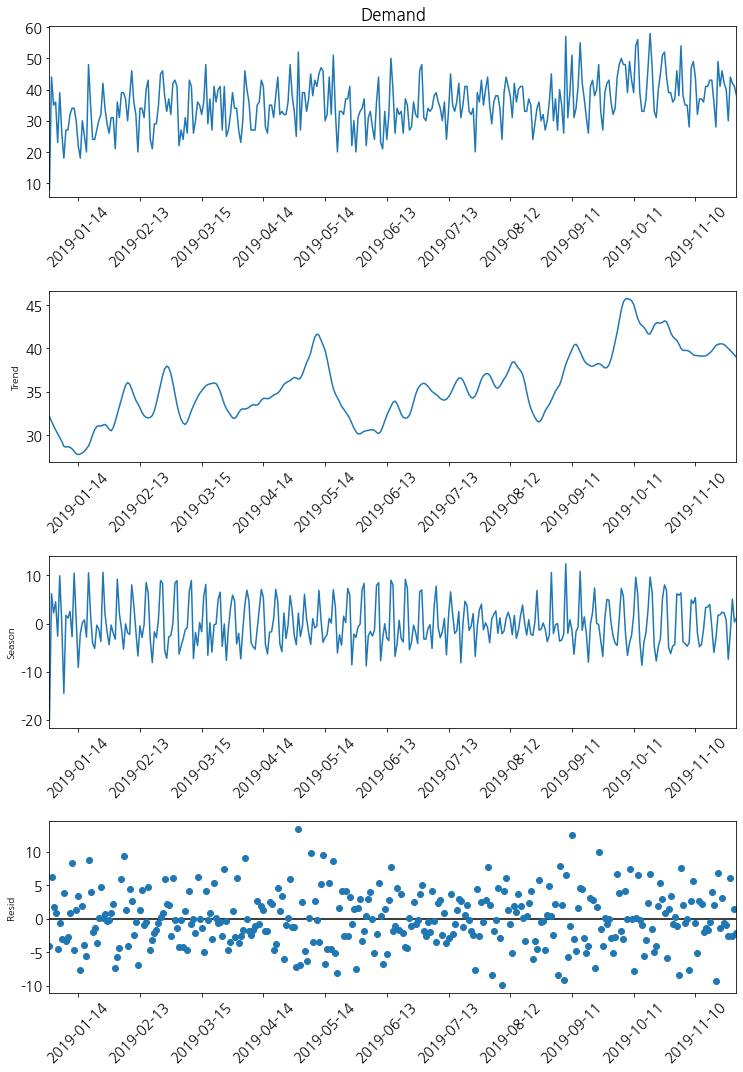

Date
2019-01-01    6.216401
2019-01-02    1.753154
2019-01-03    0.891050
2019-01-07    3.812176
2019-01-10    0.874658
                ...   
2019-11-19    1.997948
2019-11-21    6.846224
2019-11-23    3.115294
2019-11-27    6.111030
2019-11-29    1.464040
Name: resid, Length: 152, dtype: float64


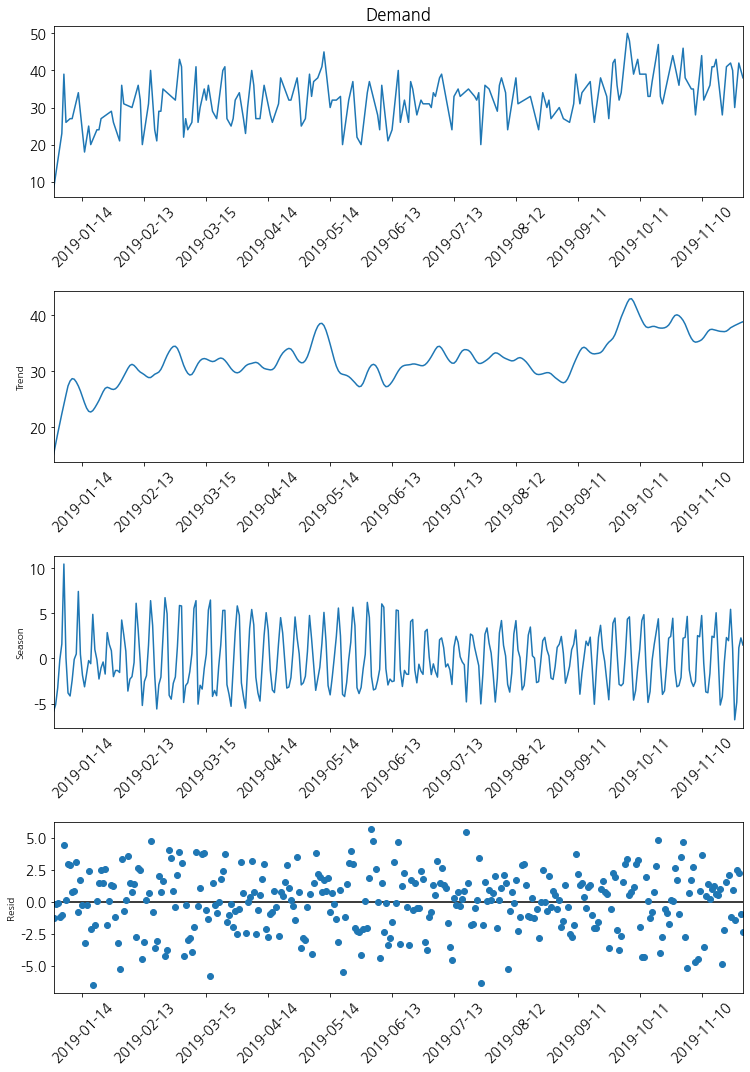

Date
2019-01-05    4.463920
2019-01-06    0.159227
2019-01-07    2.934648
2019-01-08    2.891015
2019-01-09    0.723535
                ...   
2019-11-22    1.508515
2019-11-23    2.087008
2019-11-25    0.942579
2019-11-27    2.466701
2019-11-28    2.277739
Name: resid, Length: 172, dtype: float64


/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


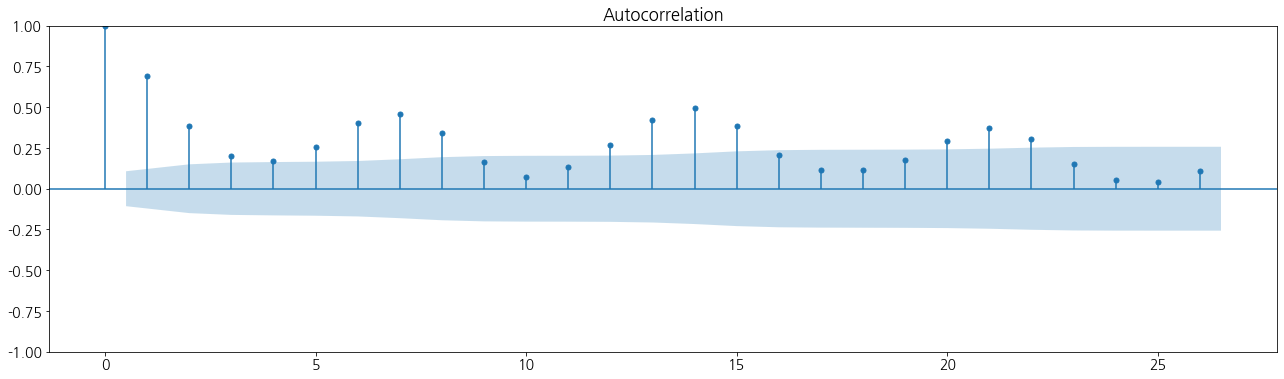

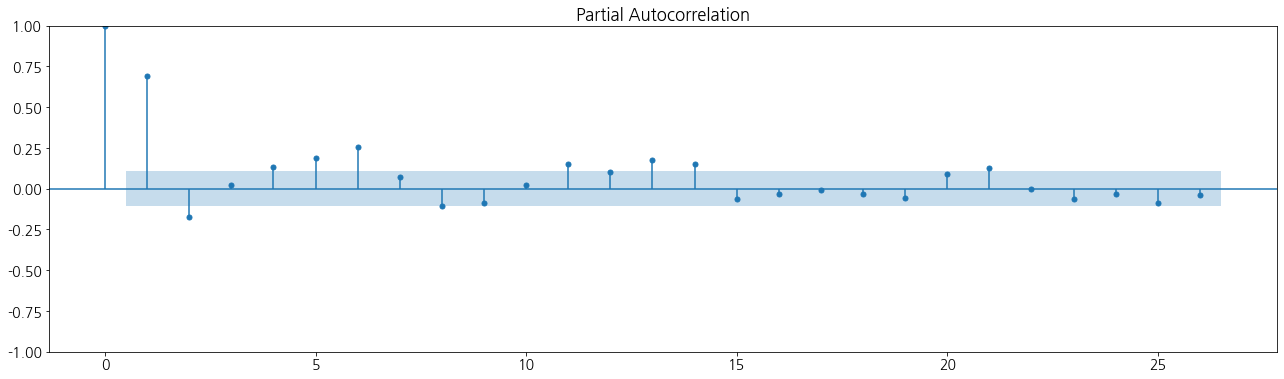

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


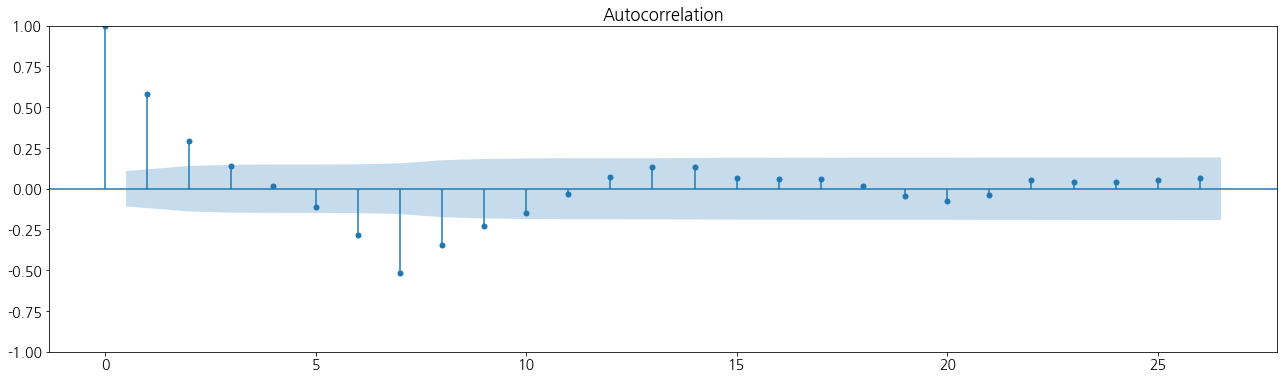

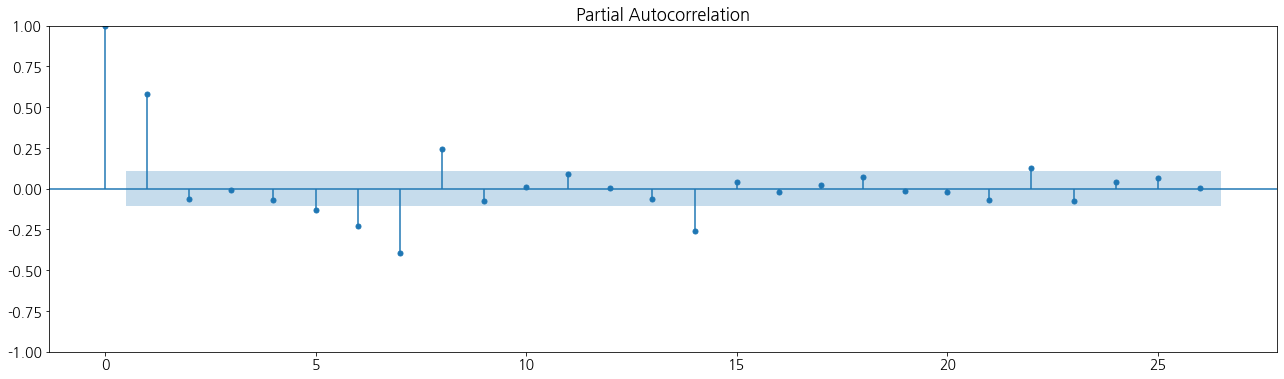

p-value of ADF test (diff 7): 3.8091271563059895e-10


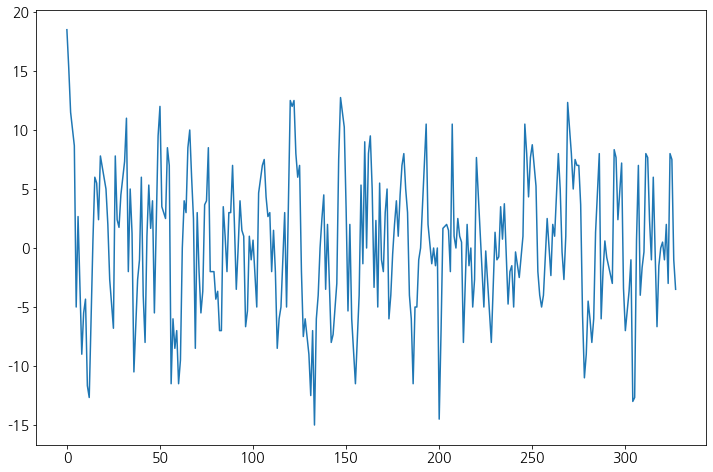

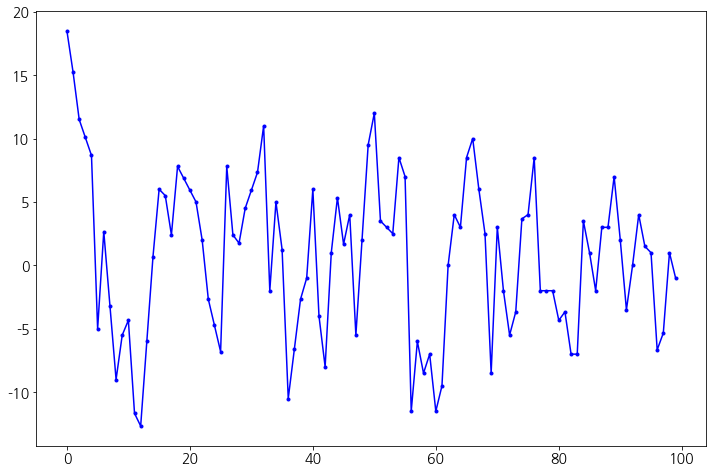

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Diff   No. Observations:                  244
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -730.170
Date:                Mon, 23 Jan 2023   AIC                           1470.341
Time:                        06:14:10   BIC                           1487.806
Sample:                    01-07-2019   HQIC                          1477.375
                         - 09-07-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5996      0.072      8.340      0.000       0.459       0.741
ar.L2          0.0375      0.074      0.509      0.610      -0.107       0.182
ar.L3         -0.0530      0.071     -0.751      0.4

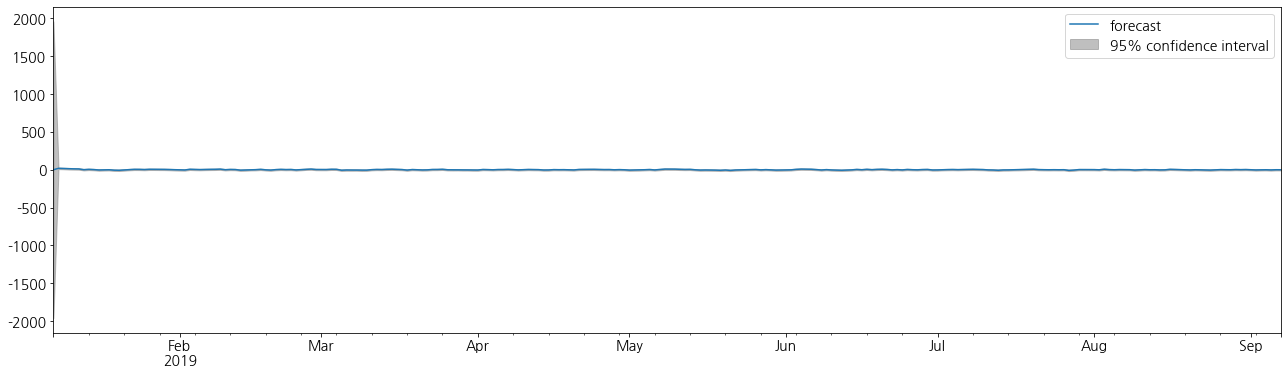

Test RMSE: 5.673103610133437



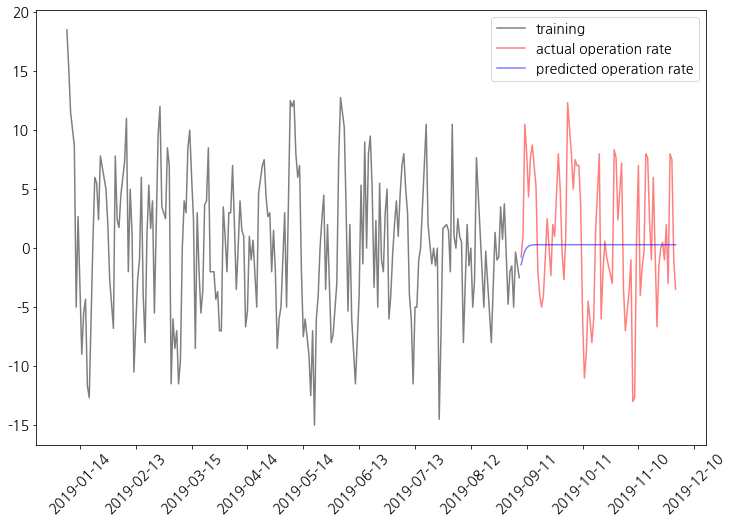





SARIMA
 ARIMA(2,0,1)(2,1,0)[7]          
[ 1.50268155 -0.56532881 -0.98890455 -1.02454115 -0.42198015 25.50666007]
1462.9346378160976
Test RMSE: 5.697784070489019



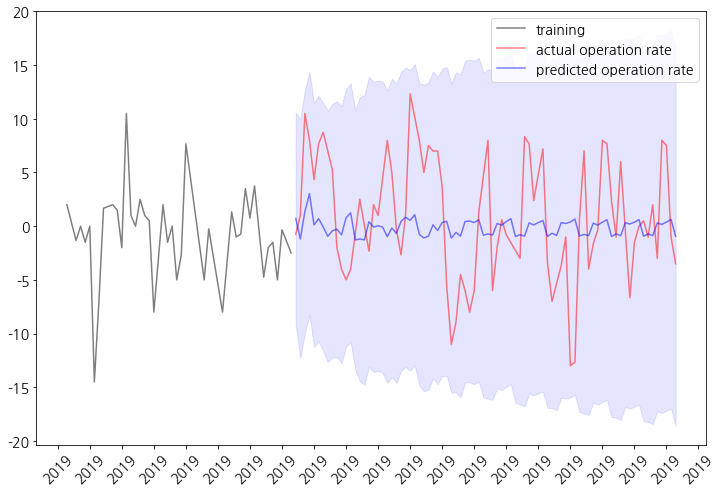

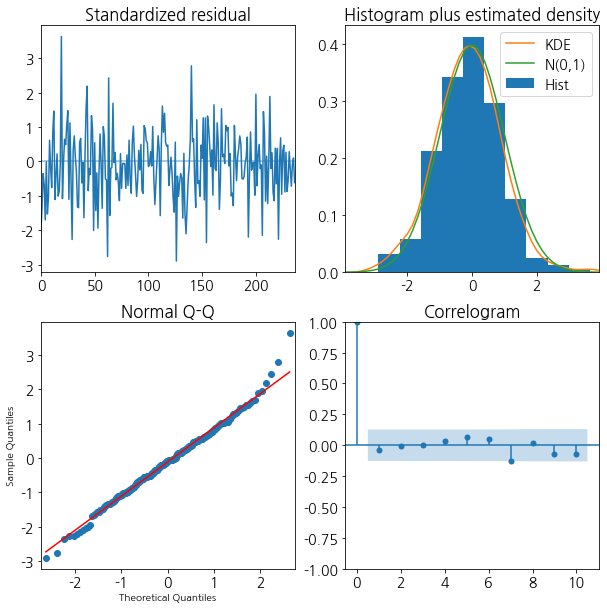

In [55]:
arima_sarima(outlier_df)

In [56]:
#age_group 제외
age1_df1 = outlier_df[outlier_df['age_group'] <= 3]
print(len(age1_df1))
car_df1 = age1_df1[age1_df1['car_model'] <= 4]
print(len(car_df1))
# age1_df1 = age1_df1.loc[outlier(age1_df1, 'age_group', 2)]
# print(len(age1_df1))

11464
11012


ARIMA


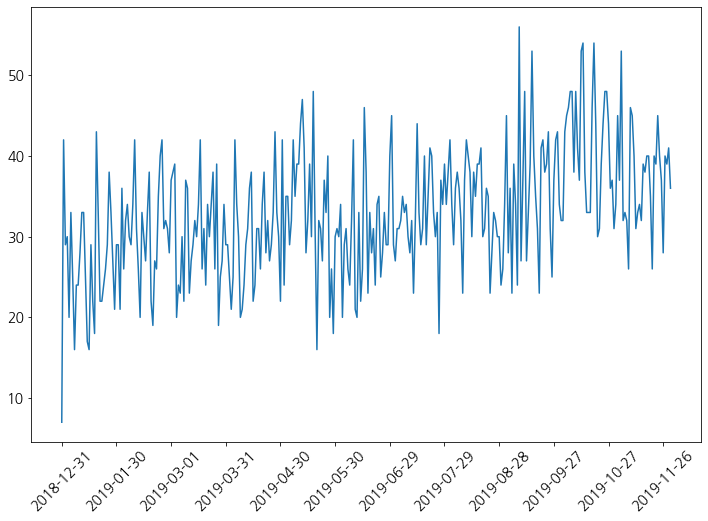

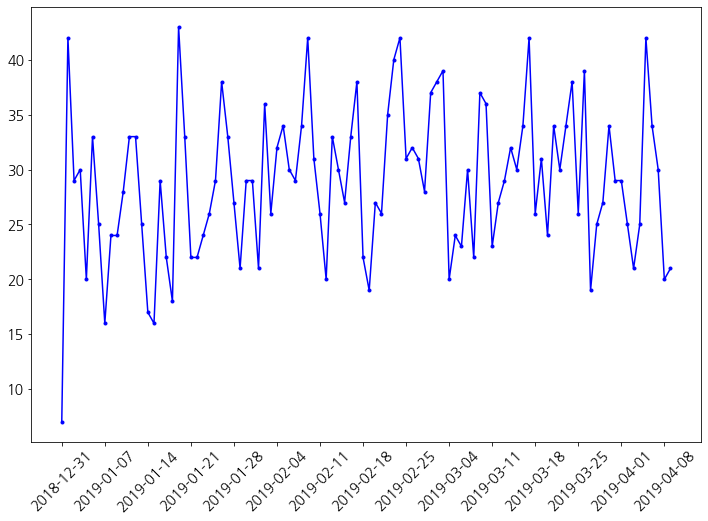

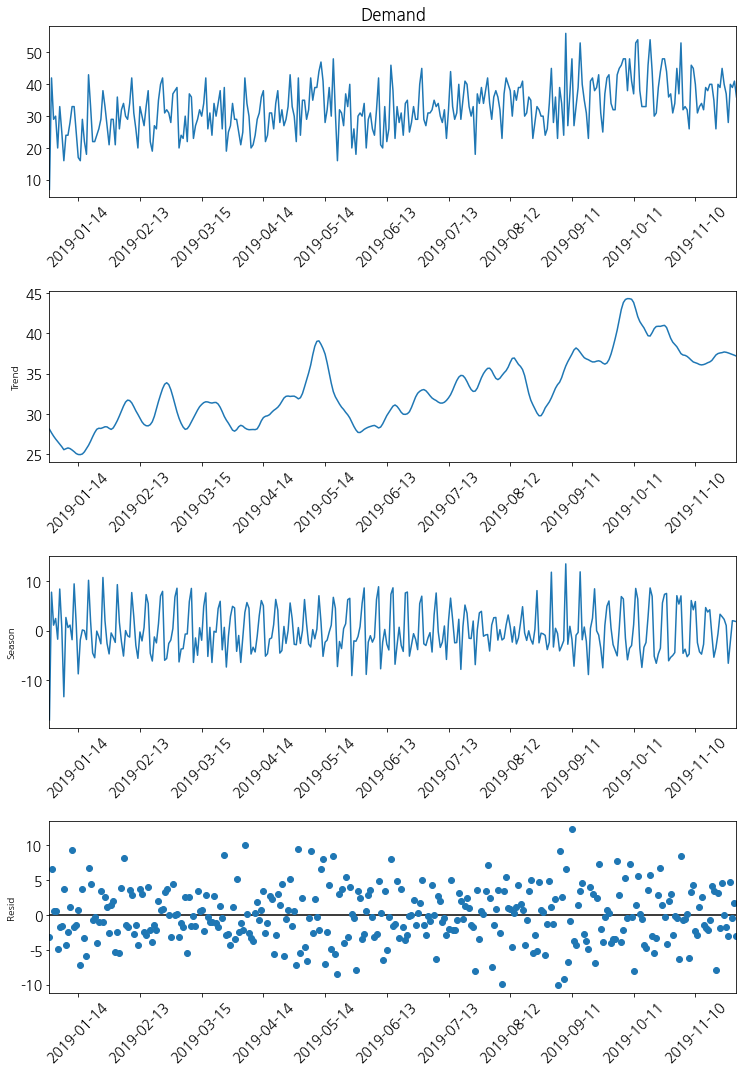

Date
2019-01-01    6.585744
2019-01-02    0.641841
2019-01-03    0.651604
2019-01-07    3.761173
2019-01-10    1.176609
                ...   
2019-11-19    3.399071
2019-11-21    3.116648
2019-11-23    4.575792
2019-11-27    4.778732
2019-11-29    1.800247
Name: resid, Length: 154, dtype: float64


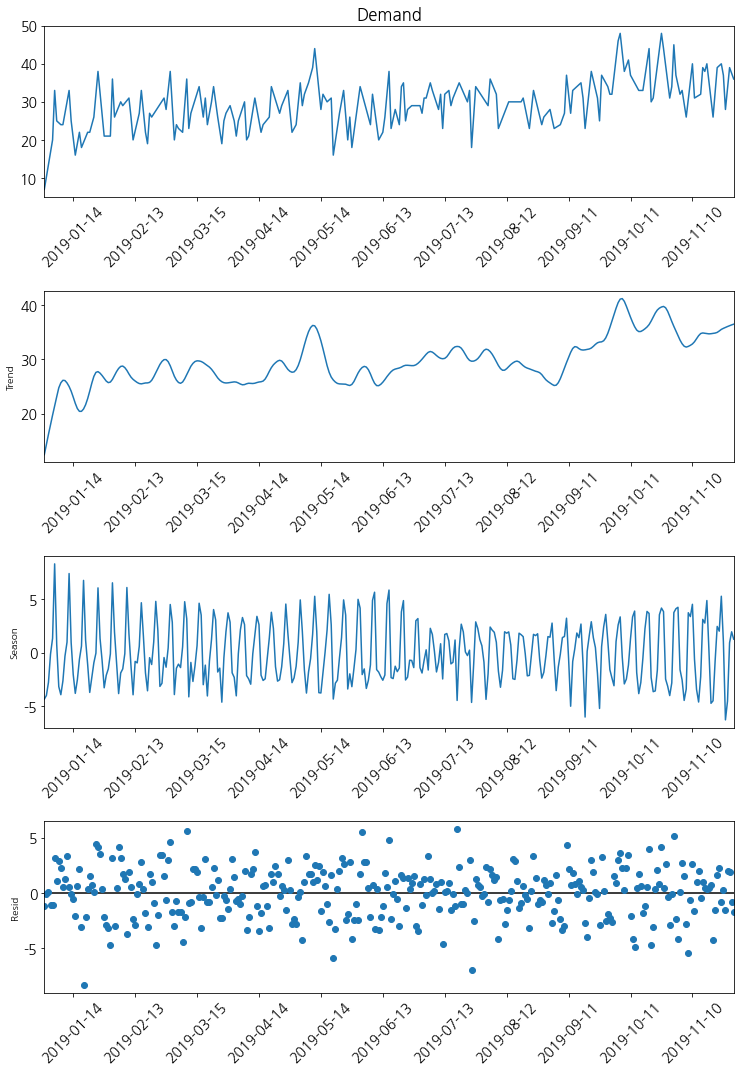

Date
2019-01-05    3.212086
2019-01-06    1.105668
2019-01-07    2.927625
2019-01-08    2.257229
2019-01-09    0.501997
                ...   
2019-11-22    1.588961
2019-11-23    2.276336
2019-11-25    0.262611
2019-11-27    2.020806
2019-11-28    1.893231
Name: resid, Length: 176, dtype: float64


/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


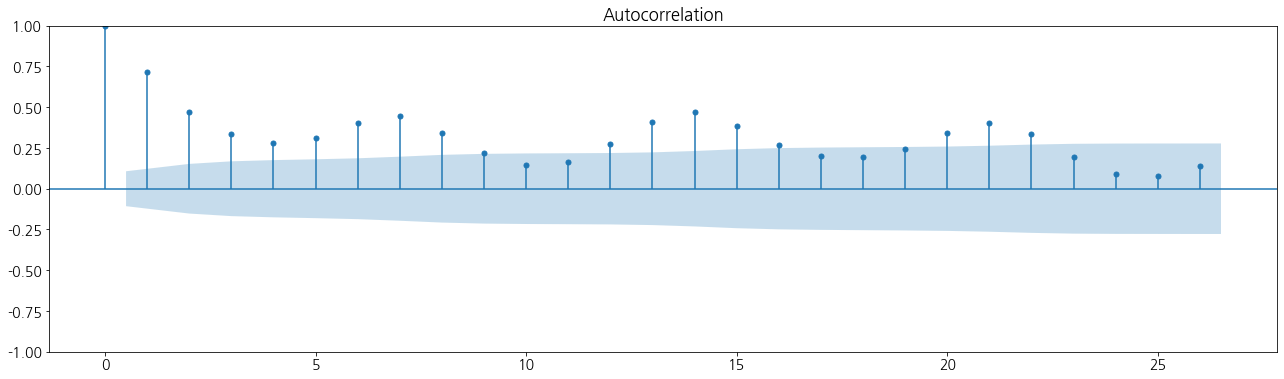

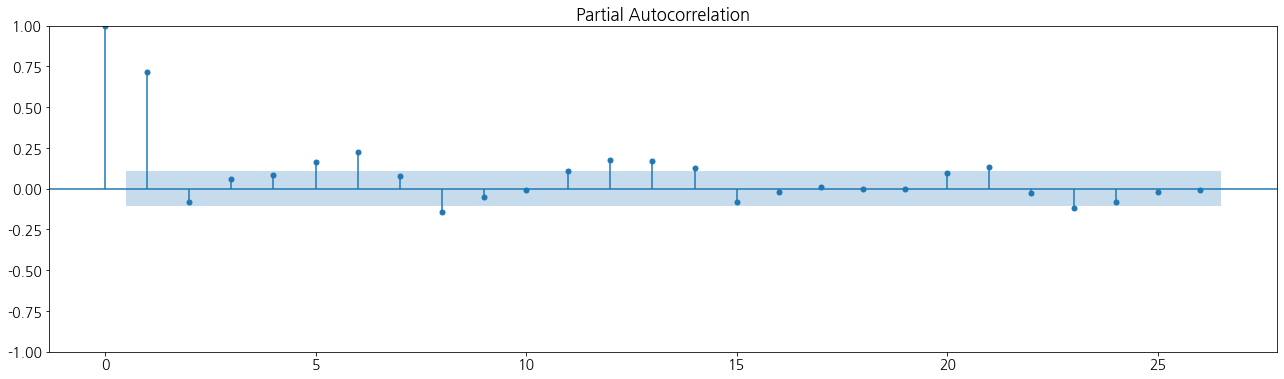

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


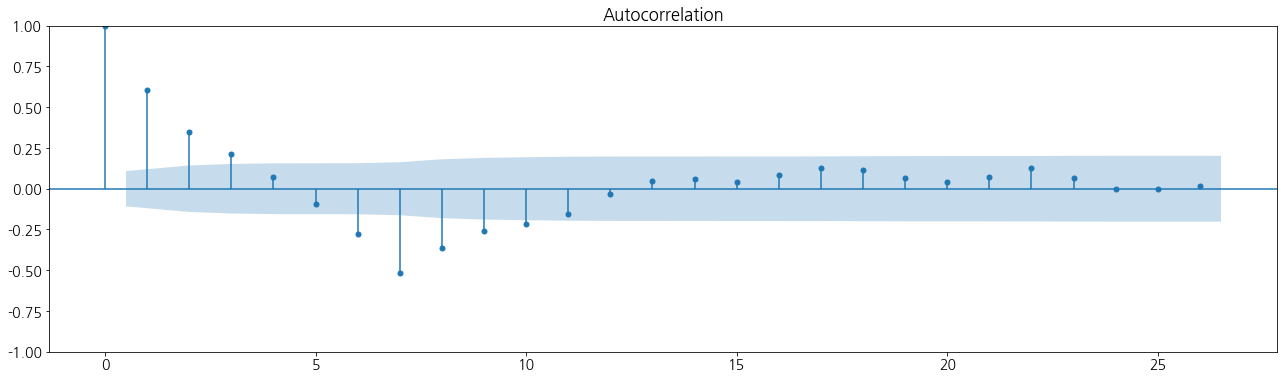

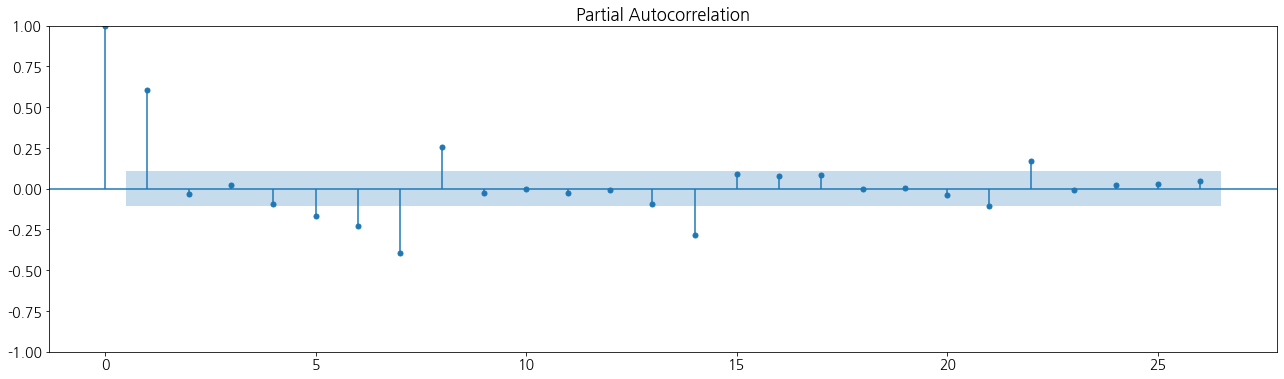

p-value of ADF test (diff 7): 4.6516937443865644e-05


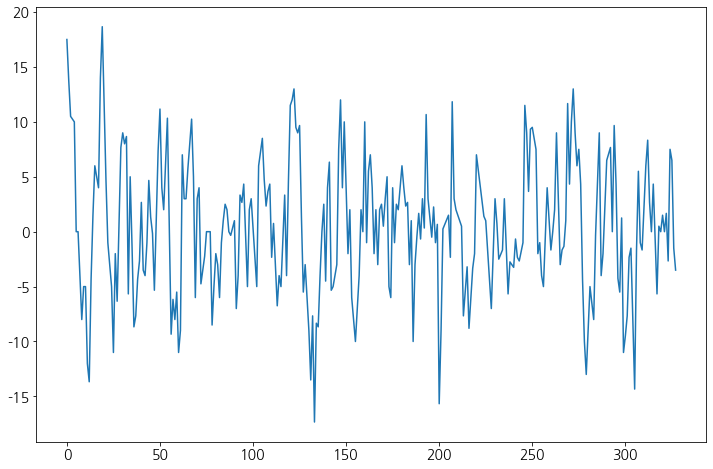

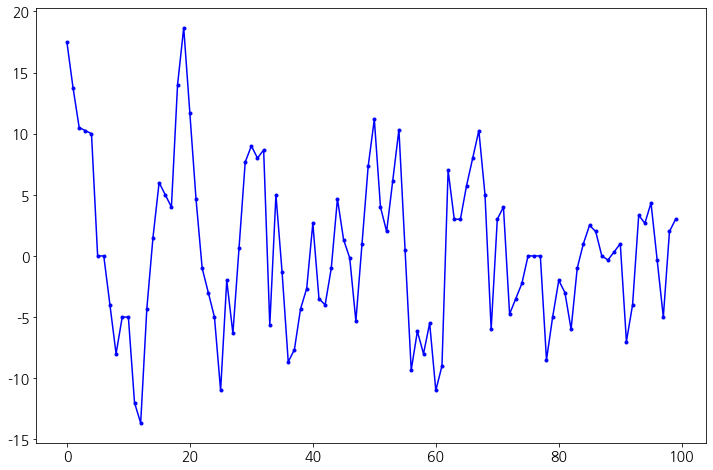

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Diff   No. Observations:                  244
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -738.620
Date:                Mon, 23 Jan 2023   AIC                           1487.240
Time:                        06:15:08   BIC                           1504.705
Sample:                    01-07-2019   HQIC                          1494.275
                         - 09-07-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0982      1.991     -0.049      0.961      -4.000       3.804
ar.L2         -0.1235      0.458     -0.270      0.787      -1.021       0.774
ar.L3         -0.0145      0.320     -0.045      0.9

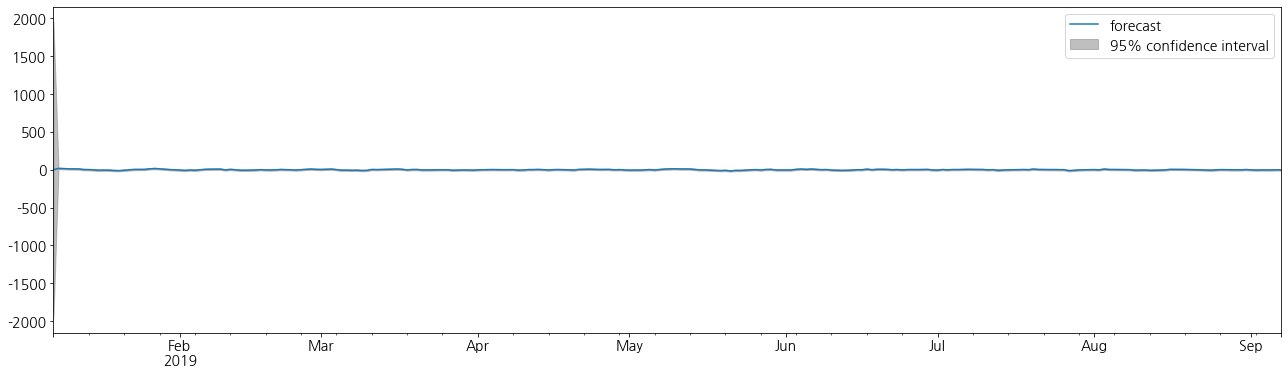

Test RMSE: 6.900996563000092



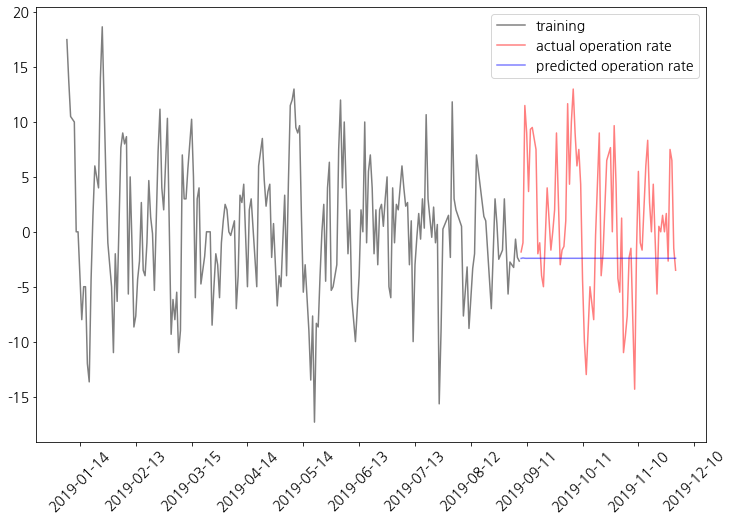





SARIMA
 ARIMA(1,0,0)(2,1,0)[7]          
[ 0.55435263 -1.04939333 -0.49593338 26.26413868]
1464.168100777746
Test RMSE: 6.703338465996065



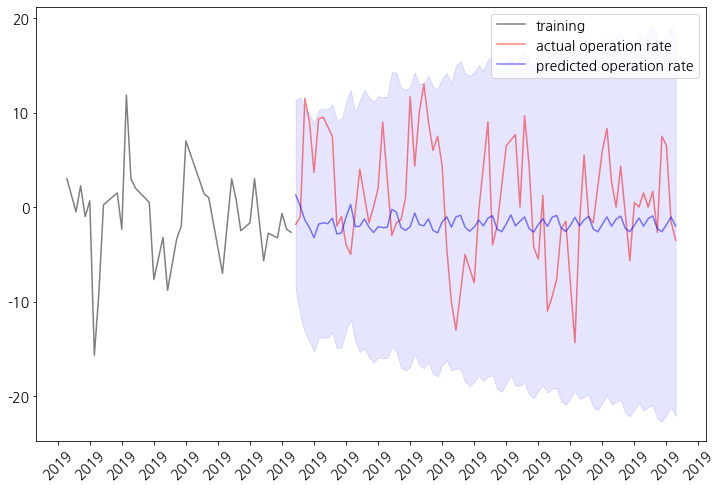

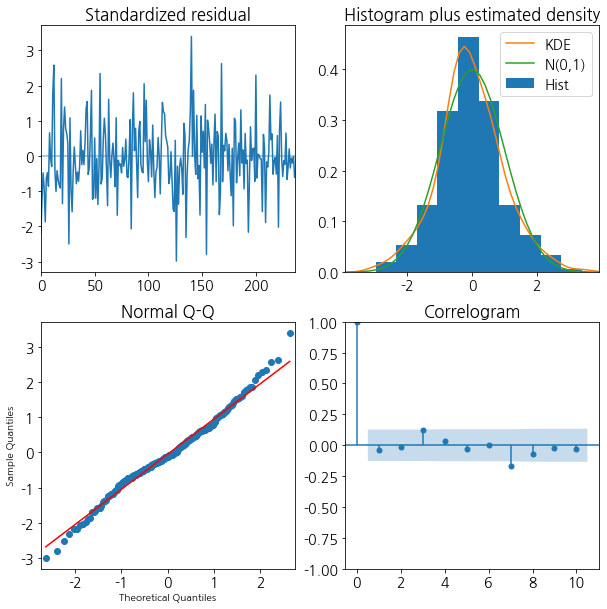

In [57]:
arima_sarima(car_df1)